## Lecture-03 Gradient Descent and Dymanic Programming

### Part I Review the online programming. 

see (https://github.com/HaiBlueSea/Assignment-NLP/blob/master/lesson-03/lesson-03.ipynb)

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

$$ loss = \frac{1}{n} \sum{|\hat{y_i} - y_i |}= \frac{1}{n} \sum{\sqrt{{(\hat y_i - y_i )}^2}}$$
$$\hat{y_i} = k* x_i + b$$

$$ \frac{\partial loss}{\partial k}= \frac1n\sum_{i=0}^n \frac{(\hat y_i - y_i)*x_i}{|\hat y_i - y_i|}$$
$$ \frac{\partial loss}{\partial b}= \frac1n\sum_{i=0}^n \frac{\hat y_i - y_i}{|\hat y_i - y_i|}$$

$$梯度下降公式: \Theta^n = \Theta^{n-1} - \alpha \nabla loss $$

In [1]:
from sklearn.datasets import load_boston
dataset = load_boston()
x, y = dataset['data'], dataset['target']
x_rm = x[:, 5]

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [14]:
#格式化输入参数，调整矩阵，方便矩阵运算
num = x_rm.shape[0] 
X0 = np.ones((num, 1))
X = np.hstack((x_rm.reshape(num, 1), X0)) #增加一个维度，方便矩阵运算
Y = y.reshape(y.shape[0], 1)
alpha = 0.01

In [15]:
def loss_var(theta, x, y):
    diff = np.dot(x, theta) - y  
    return np.mean(np.abs(diff))

In [16]:
def gradient_function(theta, x, y):
    diff = np.dot(x, theta) - y
    diff_av = diff/np.abs(diff)
    return (1.0/y.shape[0]) * np.dot(np.transpose(x),diff_av)

In [36]:
def gradient_descent(x, y, alpha, try_time = 1000):
    theta = np.array([1, 1]).reshape(2, 1) #初始k b值[[1],[1]]
    gradient = gradient_function(theta, X, Y)
    
    for _i in range(try_time):
    #while not np.all(np.abs(gradient) <= 1e-4):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, Y)
        
    return theta

In [59]:
theta = gradient_descent(X, Y ,0.1,100000) 

为了得到theta, try_time和初始条件在这影响比较大，因为loss函数相当于是一次函数，梯度几乎不变，导致不能快速下降

如果loss函数是之前的2次函数，离最低点越远，梯度越大，此时能快速下降到目标点，离目标点越远下降越快，所以try_times很小就能达到预期值

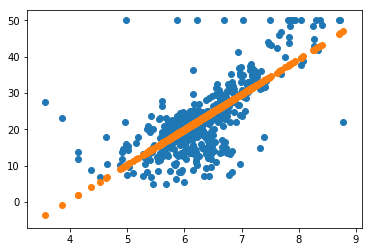

In [60]:
best_k, best_b = theta[0][0], theta[1][0]
plt.scatter(x_rm,y)
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

### Part 3: Finish the Solution Parse Part of Edit-Distance

字符替换：Edit Distance

Intention 变成 execution

| I    | N    | T    | E    | *    | N    | T    | I    | O    | N    |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| *    | E    | X    | E    | C    | U    | T    | I    | O    | N    |

三个步骤
+ 1 Insertion
+ 2 Deletion
+ 3 Substitution

分析：字符串a 长度为n ，字符串b 长度为m

定位到两串字符a和b的最末端位置，会有三种情况出现：
+ a和b匹配,这里又分为a[-1]==b[-1] 和 a[-1]!=b[-1] 两种情况
+ a和b前m-1项匹配
+ a前n-1和b匹配

在这三种情况中筛选出distance最小的那个即是我们的答案
(三种情况中，每一种情况又回到了开始时候的新的a,b的计算)

同理也可从字符首个元素分析，情况分析是一致的

$$边界条件：D(0,j) = j \ ;D(i,0) = i\\$$
$$状态转移公式：D(i,j) = min  \begin{cases}    D(i-1,j) + 1\\   D(i,j-1) + 1\\   D(i-1,j-1) + 1 \ \ if \  X[i]!=Y[j]\ else \ D(i-1,j-1)\\  \end{cases}$$


**The Edit Distance Prolem**

**edit_distance:**

**Input:** two strings  x of length n , y of length m

**Output:** min distance and its path

1:if n=0 then return m //base case

2:if m=0 then return n //base case

3:x_1 = 1 to n-1 element of x

4:y_1 = 1 to m-1 element of y

5:candidates = 

    edit_distance(x_1, y) + 1
    edit_distance(x, y_1) + 1 
    edit_distance(x_1, y_1) + 2 if x[i]==y[i] else edit_distance(x_1, y_1)

6:return max of candidates

In [1]:
from functools import lru_cache

In [2]:
solution = {}

In [3]:
@lru_cache(maxsize=2**10)
def edit_distance_start_0(string1, string2):
    '''这里从首个元素分析'''
    if len(string1)==0 : return len(string2)  #Base case
    if len(string2)==0 : return len(string1)  #Base case
    
    head_s1 = string1[0]
    head_s2 = string2[0]
    
    candidates = [
        (edit_distance_start_0(string1[1:], string2)+1 , 'DEL {}'.format(head_s1)),#删除了head_s1, string[1:]会和string2匹配
        (edit_distance_start_0(string1, string2[1:])+1 , 'ADD {}'.format(head_s2)) #增加head_s2, string会和string2匹配
    ]
    
    if head_s1==head_s2:
        candidates.append((edit_distance_start_0(string1[1:], string2[1:])+ 0 , 'No Actions'))
    else:
        candidates.append((edit_distance_start_0(string1[1:], string2[1:])+1 , 'SUB {} => {}'.format(head_s1, head_s2)))
        
                        
    min_distance, steps = min(candidates, key = lambda x:x[0])
    solution[(string1, string2)] = steps 
    
    return min_distance

In [4]:
def edit_distance_find_path(solution, string1, string2):
    '''Find path from solution'''
    current = string1, string2
    paths = []
    while(current in solution):
        current_action = solution[current]
        
        if current_action.startswith('ADD'):
            paths.append((current, current_action))
            current = current[0], current[1][1:]     
            
        elif current_action.startswith('DEL'):
            paths.append((current, current_action))
            current = current[0][1:], current[1]
            
        else :
            paths.append((current, current_action))
            current = current[0][1:], current[1][1:]
    
    return paths

In [65]:
edit_distance_start_0('intention', 'execution')

5

In [66]:
edit_distance_find_path(solution,'intention', 'execution')

[(('intention', 'execution'), 'DEL i'),
 (('ntention', 'execution'), 'SUB n => e'),
 (('tention', 'xecution'), 'SUB t => x'),
 (('ention', 'ecution'), 'No Actions'),
 (('ntion', 'cution'), 'ADD c'),
 (('ntion', 'ution'), 'SUB n => u'),
 (('tion', 'tion'), 'No Actions'),
 (('ion', 'ion'), 'No Actions'),
 (('on', 'on'), 'No Actions'),
 (('n', 'n'), 'No Actions')]

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:有方向地向目标值前进,从而快速得到预期值

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是函数在该点处的方向导数沿着该方向取得最大值,该最大值就是当前点的梯度，下降指沿着该方向函数值下降的最快


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:方法3的优点在于目标性强，不断迭代参数使得达到预期效果值,并且可以控制步长，设定最大loss值

4. Using the simple words to describe: What's the machine leanring.¶

Ans:根据变化调整自身以达目的

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

+ 把一个较复杂的问题按照阶段划分，分解为若干个较小的局部问题，然后按照局部问题的递推关系，依次作出一系列决策，直至整个问题达到总体最优的目标

+ 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

+ e

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

+ 
+ 
+ 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

+ 
+ 
+ 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

+ 最优化原理：如果问题的最优解所包含的子问题的解也是最优的，就称该问题具有最优子结构，即满足最优化原理
+ 某状态以后的过程不会影响以前的状态，只与当前状态有关。
+ 有重叠子问题

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

+ 当前的状态会影响之后状态，导致如果某个状态出错，那么之后的状态都是错的

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [6]:
import random
import matplotlib.pylab as plt

In [9]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

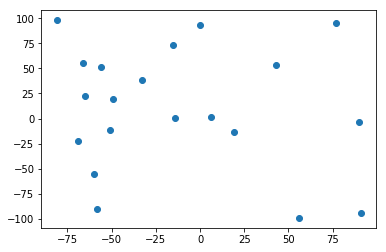

In [10]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [11]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [12]:
import matplotlib.pyplot as plt

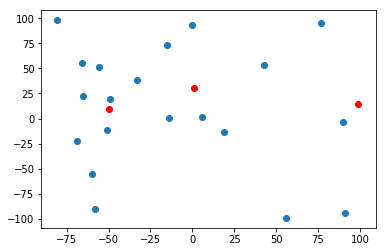

In [13]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

#### 只有一个出发点情况求解

假设有n个点编号分别是1~n，随机取编号为j的点出发;

因为选取了j点，故把j点从点集合去除，我们再从剩下的点集中选一个点出发，可见，这又变成了n-1点中求最优解的情况了，故可以同动态规划来解决该问题

$$其中d(i,j)表示i点和j点的距离$$			
$$\begin{align}\tag{3.21}边界条件：D(2,j) &= d(1, 2)\\ \tag{3.22}转移方程：D(n,j) &= min([D(n-1, i)+d(j,i), for \ i \ in \ range(n) \ and\  i!=j ])\end{align}$$


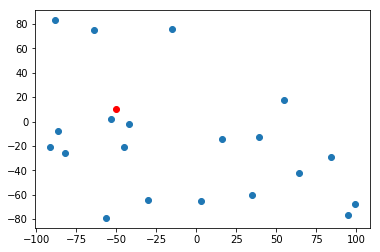

In [14]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
chosen_p = (-50, 10)
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [15]:
point_location = {}
for i in range(len(latitudes)):
    point_location[str(i+1)] = (latitudes[i], longitude[i])

point_location[str(i+2)] = chosen_p

In [16]:
point_location

{'1': (-64, 75),
 '2': (-15, 76),
 '3': (-88, 83),
 '4': (-82, -26),
 '5': (3, -65),
 '6': (-56, -79),
 '7': (-86, -8),
 '8': (-45, -21),
 '9': (95, -77),
 '10': (-53, 2),
 '11': (39, -13),
 '12': (55, 18),
 '13': (64, -42),
 '14': (99, -68),
 '15': (16, -14),
 '16': (-42, -2),
 '17': (35, -60),
 '18': (84, -29),
 '19': (-30, -64),
 '20': (-91, -21),
 '21': (-50, 10)}

In [17]:
import math
def distance_calcu(point1, point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]- point2[1])**2)

In [18]:
solution_path = {}

In [19]:
from functools import lru_cache

In [20]:
from numba import jit
from numba import autojit

In [21]:
mult = 1
for i in range(1,22):
    mult *= i
mult

51090942171709440000

In [37]:
solution_path = {}
@lru_cache(maxsize=2**30)
def min_way(string, i):
    ''' string: 点集合，用字符串来表示，主要是为了能添加到缓存中
        i：开始的点 ，字符串格式
    '''
    array_n = string.split(' ')
    
    if len(array_n) == 2: #Base case 边界条件
        solution_path[(string,i)] =  (i, string.replace(i,'').strip())
        return distance_calcu(point_location[array_n[0]], point_location[array_n[1]])
    
    array_n.remove(i)
    string_new = ' '.join(str(i) for i in array_n)
       
    #状态转移候选
    candidates = [(distance_calcu(point_location[i], point_location[j])+ min_way(string_new, j),(i,j)) for j in array_n]
    
    #筛选出最优点
    min_distance, way = min(candidates, key = lambda x:x[0])
    
    #把当前最优添加到solution
    solution_path[(string,i)] = way
    
    return min_distance

In [38]:
array_n = list(range(1, len(point_location)+1))

In [39]:
array_n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [40]:
string = ' '.join(str(i) for i in array_n)

In [41]:
string

'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21'

In [42]:
%%time
min_way(string, '21')

Wall time: 6min 36s


675.9963624776407

In [391]:
solution_path

{('19 20', '19'): ('19', '20'),
 ('19 20', '20'): ('20', '19'),
 ('18 19 20', '18'): ('18', '20'),
 ('18 20', '18'): ('18', '20'),
 ('18 20', '20'): ('20', '18'),
 ('18 19 20', '19'): ('19', '18'),
 ('18 19', '18'): ('18', '19'),
 ('18 19', '19'): ('19', '18'),
 ('18 19 20', '20'): ('20', '18'),
 ('17 18 19 20', '17'): ('17', '18'),
 ('17 19 20', '17'): ('17', '20'),
 ('17 20', '17'): ('17', '20'),
 ('17 20', '20'): ('20', '17'),
 ('17 19 20', '19'): ('19', '17'),
 ('17 19', '17'): ('17', '19'),
 ('17 19', '19'): ('19', '17'),
 ('17 19 20', '20'): ('20', '17'),
 ('17 18 19 20', '18'): ('18', '17'),
 ('17 18 20', '17'): ('17', '18'),
 ('17 18 20', '18'): ('18', '17'),
 ('17 18', '17'): ('17', '18'),
 ('17 18', '18'): ('18', '17'),
 ('17 18 20', '20'): ('20', '18'),
 ('17 18 19 20', '19'): ('19', '17'),
 ('17 18 19', '17'): ('17', '18'),
 ('17 18 19', '18'): ('18', '17'),
 ('17 18 19', '19'): ('19', '18'),
 ('17 18 19 20', '20'): ('20', '18'),
 ('16 17 18 19 20', '16'): ('16', '19'),
 ('

In [48]:
def find_path(solution, string, i):
    connection = {}
    current = string, i
   # print(current)
    while current in solution:
        from_, to_ = solution[current]
        connection[from_] = [to_.strip()]
        
        temp = current[0].split(' ')
        temp.remove(from_)
        
        current =  ' '.join(str(i) for i in temp), to_   
    
    return connection

In [49]:
nn  = find_path(solution_path, string, '21')

In [50]:
nn

{'21': ['10'],
 '10': ['16'],
 '16': ['8'],
 '8': ['7'],
 '7': ['20'],
 '20': ['4'],
 '4': ['6'],
 '6': ['19'],
 '19': ['5'],
 '5': ['17'],
 '17': ['9'],
 '9': ['14'],
 '14': ['18'],
 '18': ['13'],
 '13': ['11'],
 '11': ['15'],
 '15': ['12'],
 '12': ['2'],
 '2': ['1'],
 '1': ['3']}

In [51]:
point_location

{'1': (-64, 75),
 '2': (-15, 76),
 '3': (-88, 83),
 '4': (-82, -26),
 '5': (3, -65),
 '6': (-56, -79),
 '7': (-86, -8),
 '8': (-45, -21),
 '9': (95, -77),
 '10': (-53, 2),
 '11': (39, -13),
 '12': (55, 18),
 '13': (64, -42),
 '14': (99, -68),
 '15': (16, -14),
 '16': (-42, -2),
 '17': (35, -60),
 '18': (84, -29),
 '19': (-30, -64),
 '20': (-91, -21),
 '21': (-50, 10)}

In [52]:
import networkx as nx 

D:\Design Software\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


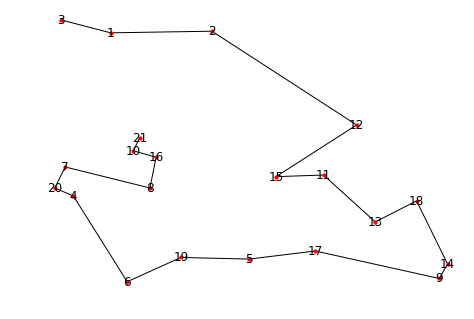

In [53]:
nx.draw(nx.Graph(nn), point_location, with_labels = True, node_size = 10)

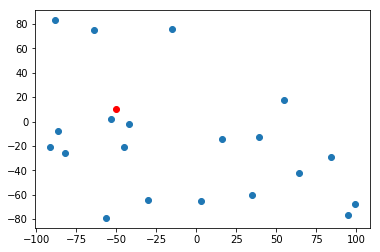

In [54]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

之前是用@lru_cache备忘功能实现缓存，现在自定义个memo函数来实现该功能

In [28]:
from functools import wraps

In [29]:
def memo(f):
    memo.already_calcu = {}
    @wraps(f)
    def wrap(string, i):
        if (string, i) not in memo.already_calcu:
            distance = f(string, i)
           #print('test')
            memo.already_calcu[(string, i)] = distance
            return distance
        else:
            return memo.already_calcu[(string, i)]
    return wrap     

In [30]:
solution_path = {}

@memo
def min_way_memo(string, i):
    ''' string: 点集合，用字符串来表示，主要是为了能添加到缓存中
        i：开始的点 ，字符串格式
    '''
    array_n = string.split(' ')
    
    if len(array_n) == 2: #Base case 边界条件
        solution_path[(string,i)] =  (i, string.replace(i,'').strip())
        return distance_calcu(point_location[array_n[0]], point_location[array_n[1]])
    
    array_n.remove(i)
    string_new = ' '.join(str(i) for i in array_n)
       
    #状态转移候选
    candidates = [(distance_calcu(point_location[i], point_location[j])+ min_way(string_new, j),(i,j)) for j in array_n]
    
    #筛选出最优点
    min_distance, way = min(candidates, key = lambda x:x[0])
    
    #把当前最优添加到solution
    solution_path[(string,i)] = way
    
    return min_distance

In [31]:
string

'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21'

In [32]:
min_way_memo(string, '21') #大概要执行6min 

675.9963624776407

#### 多个出发点的情况

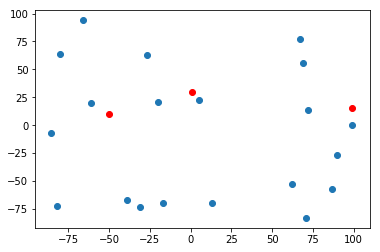

In [58]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

思考中！！！